In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('training_set.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [25]:
df.shape

(3309, 11)

In [26]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [27]:
X = df.drop('SOURCE',axis=1)
y = df.SOURCE

In [28]:
def fun(df):
    if df=='Male':
        return 0
    else:
        return 1
X.SEX = X.SEX.apply(fun)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [30]:
X_train.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2172,42.4,14.3,4.98,2.4,50,28.7,33.7,85.1,26,1
2548,24.7,8.5,2.55,4.7,434,33.3,34.4,96.9,14,1
907,40.2,13.7,4.73,2.4,60,29.0,34.1,85.0,25,1
113,42.0,14.3,4.96,14.3,216,28.8,34.0,84.7,20,1
2662,29.7,10.0,3.57,31.6,121,28.0,33.7,83.2,35,1


In [31]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [32]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(10,),activation='relu'),
    keras.layers.Dense(45,activation='relu'),
    keras.layers.Dense(55, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    # keras.layers.Dense(75, activation='relu'),
    # keras.layers.Dense(85, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
histroy = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
78/78 [==============================] - 0s 630us/step - loss: 0.6253 - accuracy: 0.6759
Epoch 2/50
78/78 [==============================] - 0s 712us/step - loss: 0.5598 - accuracy: 0.7291
Epoch 3/50
78/78 [==============================] - 0s 674us/step - loss: 0.5379 - accuracy: 0.7412
Epoch 4/50
78/78 [==============================] - 0s 751us/step - loss: 0.5334 - accuracy: 0.7428
Epoch 5/50
78/78 [==============================] - 0s 971us/step - loss: 0.5281 - accuracy: 0.7477
Epoch 6/50
78/78 [==============================] - 0s 881us/step - loss: 0.5224 - accuracy: 0.7477
Epoch 7/50
78/78 [==============================] - 0s 699us/step - loss: 0.5211 - accuracy: 0.7525
Epoch 8/50
78/78 [==============================] - 0s 674us/step - loss: 0.5156 - accuracy: 0.7557
Epoch 9/50
78/78 [==============================] - 0s 725us/step - loss: 0.5116 - accuracy: 0.7598
Epoch 10/50
78/78 [==============================] - 0s 790us/step - loss: 0.5084 - accuracy: 0.7626

In [33]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78       486
           1       0.72      0.57      0.64       342

    accuracy                           0.73       828
   macro avg       0.73      0.71      0.71       828
weighted avg       0.73      0.73      0.72       828



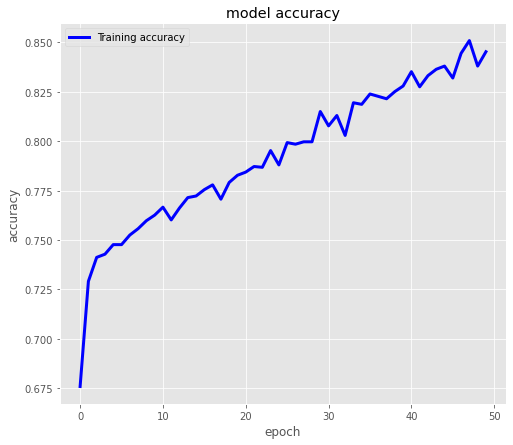

In [58]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(8,7))
plt.plot(histroy.history['accuracy'],'b',linewidth=3,label='Training accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.legend()
plt.show()